<a href="https://colab.research.google.com/github/AlexBorealis/pyda_diplom_54/blob/master/Kozlov_diplom_pyda_54.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Diplom pyda-54

data:
https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=drive_link

In [ ]:
from google.colab import drive
import pandas as pd
from pandas.api.types import is_int64_dtype
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
url = 'https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=drive_link'
reconstructed_url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
HR_df = pd.read_csv(reconstructed_url)

HR_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
# Описание датасета (основные статистики)
HR_df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
# Проверка на полноту (есть ли пропуски в данных)
HR_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
# Выбрать только количественные переменные
HR_df.select_dtypes(include= [np.number])

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0


In [ ]:
# Выбрать только качественные переменные (для примера)
HR_df.select_dtypes(include= [object])

,department,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low
...,...,...
14994,support,low
14995,support,low
14996,support,low
14997,support,low


<Axes: >

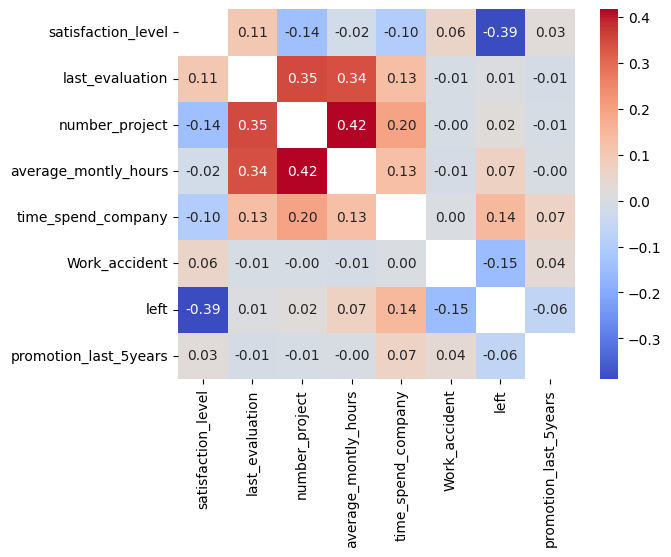

In [ ]:
# Корреляционная матрица для количественных переменных
corr_matrix = HR_df.select_dtypes(include= [np.number]).corr()

# Убрать диагональные элементы (дисперсии)
np.fill_diagonal(corr_matrix.values, np.nan)

# Визуализация
sns.heatmap(data= corr_matrix, annot= True, cmap= 'coolwarm', fmt= '.2f')

In [ ]:
# Определение экстремальных завсимостей между переменными
max_index_corr_matrix = corr_matrix.unstack().idxmax()
min_index_corr_matrix = corr_matrix.unstack().idxmin()

print(f'максимальный коэффициент корреляции Пирсона наблюдается между переменными {max_index_corr_matrix[0]} и {max_index_corr_matrix[1]}')
print(f'минимальный коэффициент корреляции Пирсона наблюдается между переменными {min_index_corr_matrix[0]} и {min_index_corr_matrix[1]}')

максимальный коэффициент корреляции Пирсона наблюдается между переменными number_project и average_montly_hours
минимальный коэффициент корреляции Пирсона наблюдается между переменными satisfaction_level и left


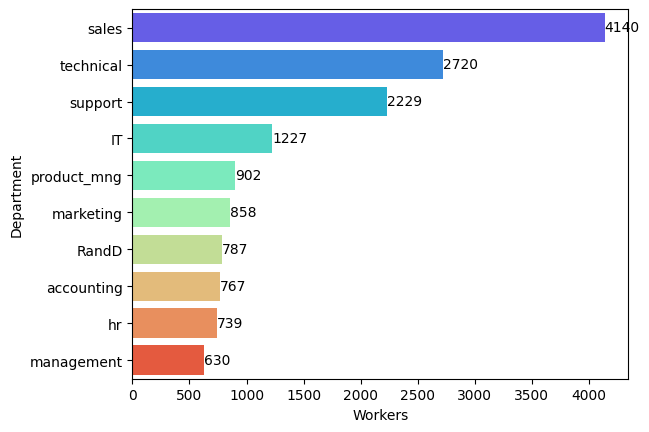

In [ ]:
# Количество сотрудников в каждом департаменте
workers_by_department = pd.DataFrame({'count': HR_df.value_counts('department')}).reset_index()
fig = sns.barplot(data= workers_by_department,
                  x= 'count', y= 'department',
                  hue= 'department', palette= 'rainbow')
fig.get_xaxis().set_label_text('Workers')
fig.get_yaxis().set_label_text('Department')
[fig.bar_label(i, fontsize= 10) for i in fig.containers]
plt.show()

# P. S.
# Можно ли порядок цветов в палитре поменять или это возможно только для заданного списка цветов?

(11428, 10)

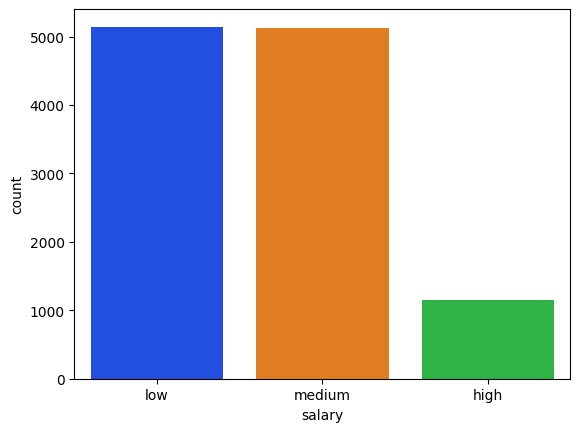

In [ ]:
# Распределение зарплат сотрудников (общее)
sns.countplot(data= HR_df.loc[HR_df.left != 1, :], x= 'salary', hue= 'salary', palette= 'bright')
HR_df.loc[HR_df.left != 1, :].shape

rows: 14999
columns: 10


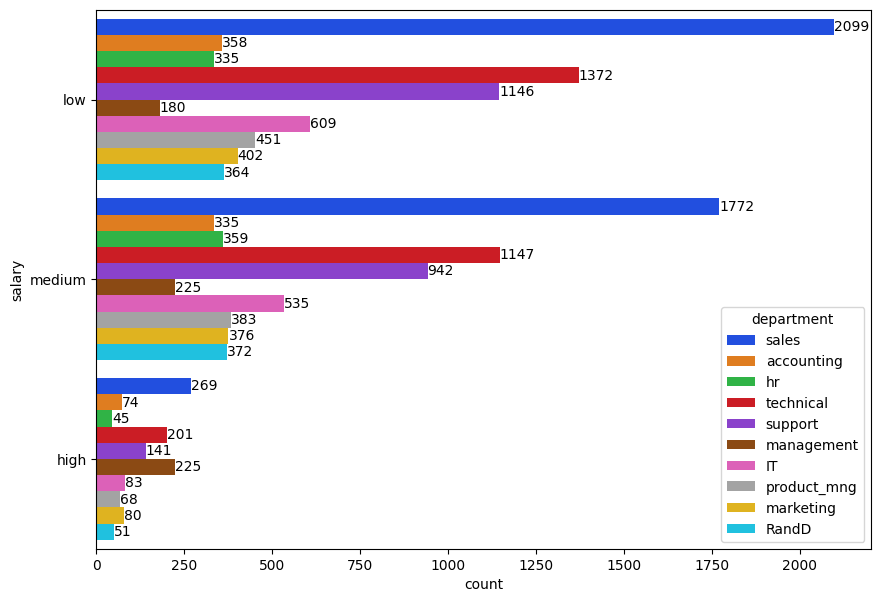

In [ ]:
# Распределение зарплат сотрудников (по департаментам)

print(f'rows: {HR_df.shape[0]}\ncolumns: {HR_df.shape[1]}')
f, fig1 = plt.subplots(figsize = (10, 7))
fig1 = sns.countplot(data= HR_df,
                     palette= 'bright', y= 'salary',
                     hue= 'department', width= .9)
[fig1.bar_label(i, fontsize= 10) for i in fig1.containers]
# for p in fig1.patches:
#     fig1.text(p.get_x() + p.get_width() / 2,
#               p.get_height(), int(p.get_height()),
#               fontsize= 8, ha= 'center', va= 'bottom')
plt.show()

Не отклоняем нулевую гипотезу, дисперссии, вероятно, одинаковые
Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые


<Axes: xlabel='average_montly_hours', ylabel='salary'>

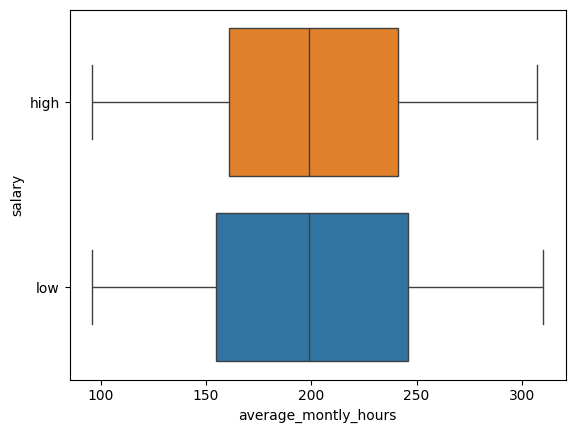

In [ ]:
# Отфильтрованные по зарплатам данные
df_for_work_time = HR_df.loc[HR_df.salary.isin(['high', 'low']), ['salary', 'average_montly_hours']]

# Функции для проверки стат критериев (дисп и средних)
def f_test(data1, data2):
    f = np.var(data1, ddof= 1)/np.var(data2, ddof= 1)
    nun = data1.size - 1
    dun = data2.size - 1
    p_value = 1 - st.f.cdf(f, nun, dun)
    return f, p_value

def check_var(data1, data2):
    _, p = f_test(data1, data2)
    if p > 0.05:
        print('Не отклоняем нулевую гипотезу, дисперссии, вероятно, одинаковые')
    else:
        print('Отклоняем нулевую гипотезу, дисперссии, вероятно, различаются')

def check_means(data1, data2, equal_var= True, alternative= 'greater'):
    _, p = st.ttest_ind(data1, data2, equal_var= equal_var, alternative= alternative)
    if p > 0.05:
        print('Не отклоняем нулевую гипотезу, средние, вероятно, одинаковые')
    else:
        print('Отклоняем нулевую гипотезу, средние в первой выборке больше, чем во второй')

# Проверка равенства дисперсий
check_var(df_for_work_time.loc[df_for_work_time.salary == 'high', 'average_montly_hours'],
          df_for_work_time.loc[df_for_work_time.salary == 'low', 'average_montly_hours'])

# Проверка гипотезы о том, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом
check_means(df_for_work_time.loc[df_for_work_time.salary == 'high', 'average_montly_hours'],
            df_for_work_time.loc[df_for_work_time.salary == 'low', 'average_montly_hours'])

# Визуализация
sns.boxplot(data= df_for_work_time, x= 'average_montly_hours', y= 'salary', hue= 'salary', order= ['high', 'low'])

In [ ]:
# Показатели среди уволившихся и не уволившихся сотрудников (по отдельности)
df_for_left_workers = HR_df.loc[HR_df['left'] == 1, :]
df_for_non_left_workers = HR_df.loc[HR_df['left'] == 0, :]

In [ ]:
# Доля сотрудников с повышением за последние 5 лет

# Уволившиеся
ratio_with_promotion_for_left_workers = df_for_left_workers['promotion_last_5years'].value_counts(normalize= True)
print(f'Доля сотрудников с повышением за последние 5 лет (для уволившися) {round(ratio_with_promotion_for_left_workers[0] * 100, 2)}%')
print(f'Доля сотрудников без повышения за последние 5 лет (для уволившися) {round(ratio_with_promotion_for_left_workers[1] * 100, 2)}%')

print('-------------------------------------------------------------------------------------------------------------')

# Работающие в компании
ratio_with_promotion_for_non_left_workers = df_for_non_left_workers['promotion_last_5years'].value_counts(normalize= True)
print(f'Доля сотрудников с повышением за последние 5 лет (для работающих в компании) {round(ratio_with_promotion_for_non_left_workers[0] * 100, 2)}%')
print(f'Доля сотрудников без повышения за последние 5 лет (для работающих в компании) {round(ratio_with_promotion_for_non_left_workers[1] * 100, 2)}%')

Доля сотрудников с повышением за последние 5 лет (для уволившися) 99.47%
Доля сотрудников без повышения за последние 5 лет (для уволившися) 0.53%
-------------------------------------------------------------------------------------------------------------
Доля сотрудников с повышением за последние 5 лет (для работающих в компании) 97.37%
Доля сотрудников без повышения за последние 5 лет (для работающих в компании) 2.63%


In [ ]:
# Средняя степень удовлетворенности

# Уволившиеся
mean_satisfaction_level_for_left_workers = df_for_left_workers.satisfaction_level.mean()
print(f'Средняя степень удовлетворенности (для уволившися) {round(mean_satisfaction_level_for_left_workers * 100, 2)}%')

print('-------------------------------------------------------------------------------------------------------------')

# Работающие в компании
mean_satisfaction_level_for_non_left_workers = df_for_non_left_workers.satisfaction_level.mean()
print(f'Средняя степень удовлетворенности (для работающих в компании) {round(mean_satisfaction_level_for_non_left_workers * 100, 2)}%')

Средняя степень удовлетворенности (для уволившися) 44.01%
-------------------------------------------------------------------------------------------------------------
Средняя степень удовлетворенности (для работающих в компании) 66.68%


In [ ]:
# Среднее количество проектов

# Уволившиеся
mean_number_project_for_left_workers = df_for_left_workers.number_project.mean()
print(f'Среднее количество проектов (для уволившися) {round(mean_number_project_for_left_workers, 2)}')

print('-------------------------------------------------------------------------------------------------------------')

# Работающие в компании
mean_number_project_for_non_left_workers = df_for_non_left_workers.number_project.mean()
print(f'Среднее количество проектов (для работающих в компании) {round(mean_number_project_for_non_left_workers, 2)}')

Среднее количество проектов (для уволившися) 3.86
-------------------------------------------------------------------------------------------------------------
Среднее количество проектов (для работающих в компании) 3.79


In [ ]:
# Разбиение выборки на тренировочную и тестовую
y = HR_df.left
x = HR_df.drop(columns= ['department', 'salary'])
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 13)

In [ ]:
# Обучение данных и прогнозирование на тестовой выборке
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
print(classification_report(y_test, lda.predict(x_test)))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      2854
           1       0.51      0.26      0.34       896

    accuracy                           0.76      3750
   macro avg       0.66      0.59      0.60      3750
weighted avg       0.73      0.76      0.73      3750



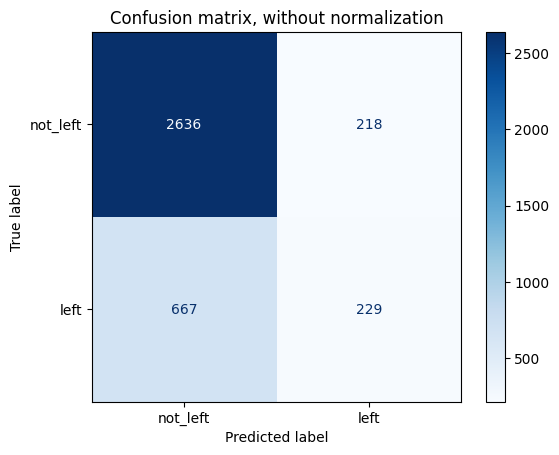

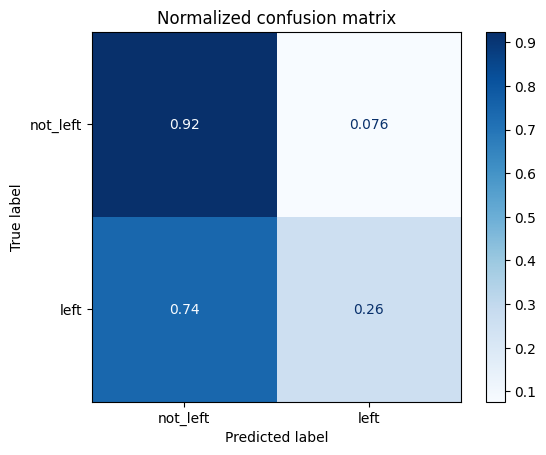

In [ ]:
# Визуализация
df = pd.DataFrame({'real': y_test,
                   'predicted': lda.predict(x_test)})

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        lda.fit(x_train, y_train),
        x_test,
        y_test,
        cmap= plt.cm.Blues,
        normalize= normalize,
        display_labels= ['not_left', 'left']
    )
    disp.ax_.set_title(title)

plt.show()